In [38]:
# 勾配ブースティング（回帰）の実装
from sklearn.tree import DecisionTreeRegressor 
class MyGradientBoostingRegressor:
    def __init__(self, learning_rate=0.02, n_estimators=100, max_depth=1, random_state=0):
        self.learning_rate = learning_rate
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        self.F0 = y.mean()
        Fb = self.F0

        for _ in range(self.n_estimators):
            # 残差を計算
            r = y - Fb
            estimator = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            estimator.fit(X, r)
            weight = estimator.predict(X)
            # Fb = Fb + self.learning_rate * weight
            Fb += self.learning_rate * weight
            self.estimators.append(estimator) 

    def predict(self, X):
        
        Fb = self.F0
        for estimator in self.estimators:
            Fb += self.learning_rate * estimator.predict(X)

        return Fb

<Axes: xlabel='horsepower', ylabel='mpg'>

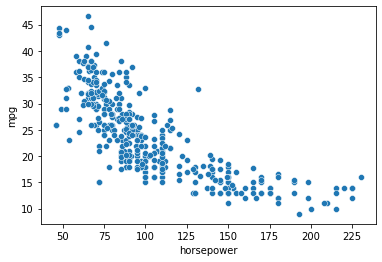

In [39]:
# データ準備
import seaborn as sns
df = sns.load_dataset("mpg")
df.dropna(inplace=True)
X = df["horsepower"].values.reshape(-1, 1)
y = df["mpg"].values
sns.scatterplot(x=df["horsepower"], y=df["mpg"])

In [40]:
mgbr = MyGradientBoostingRegressor()
mgbr.fit(X, y)
mgbr.predict(X)[:10]

array([18.34741142, 17.12764094, 17.12764094, 17.12764094, 17.45285907,
       17.12764094, 17.12764094, 17.12764094, 17.12764094, 17.12764094])

# sklearnのGradientBoostingRegressor場合

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
# colabの場合（の後、引数が自動表示される
lr = 0.02
gbr = GradientBoostingRegressor(learning_rate=lr, n_estimators=100, max_depth=1, random_state=0).fit(X, y)

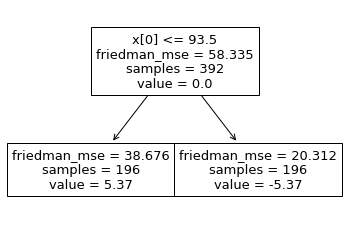

In [61]:
# 作られたモデルの確認
from sklearn.tree import plot_tree
model = gbr.estimators_[2][0]
_ = plot_tree(model)


In [44]:
gbr.predict(X)[:10]

array([18.34741142, 17.12764094, 17.12764094, 17.12764094, 17.45285907,
       17.12764094, 17.12764094, 17.12764094, 17.12764094, 17.12764094])

In [47]:
mgbr.predict(X)[:20] == gbr.predict(X)[:20]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [66]:
results = []
idx = 0
for k in gbr.estimators_:
    result = k[0].predict([X[idx]])
    results.append(result*lr)

In [69]:
results[:10]

[array([-0.11183673]),
 array([-0.1096]),
 array([-0.107408]),
 array([-0.11556619]),
 array([-0.07394944]),
 array([-0.11177588]),
 array([-0.07152643]),
 array([-0.10810983]),
 array([-0.06918283]),
 array([-0.10965879])]

In [76]:
import numpy as np
F0 = np.mean(y)
Fb= F0 + np.cumsum(results)
Fb

array([23.33408163, 23.22448163, 23.11707363, 23.00150744, 22.927558  ,
       22.81578212, 22.74425569, 22.63614586, 22.56696303, 22.45730424,
       22.3903489 , 22.28422239, 22.21942281, 22.1299423 , 22.02902393,
       21.96720548, 21.9066234 , 21.81017141, 21.71564845, 21.65774758,
       21.52576244, 21.46951629, 21.34129577, 21.28665707, 21.16209374,
       21.08750292, 20.96018143, 20.9082926 , 20.78455532, 20.73412306,
       20.61386917, 20.58140027, 20.50336095, 20.47180305, 20.35679556,
       20.31004928, 20.20403934, 20.17386331, 20.11084049, 20.0802934 ,
       19.9731161 , 19.94454228, 19.84008001, 19.79780978, 19.69628215,
       19.66895186, 19.6032813 , 19.57671777, 19.47961199, 19.45372292,
       19.35907703, 19.32074584, 19.23350579, 19.20875109, 19.15688209,
       19.06817302, 19.04427367, 18.95781677, 18.93351935, 18.88007774,
       18.85742741, 18.88350479, 18.85001625, 18.76953069, 18.7478592 ,
       18.77156565, 18.75043246, 18.69953796, 18.7223774 , 18.70

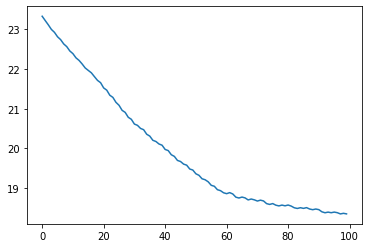

In [77]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.plot(Fb)

In [78]:
# 真の値
y[0]

18.0